## Give Me Some Credit :: Dataset.

In [116]:
import pandas as pd 

df = pd.read_csv('credit_raw.csv', sep=',')

del df['ID']

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [117]:
print("This Dataset has a total of", len(df['default payment next month']), "rows.")

This Dataset has a total of 30000 rows.


### Features Overview.

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

### To a better vizualization of the datapoints, we will work with only two features.

In [119]:
credit = pd.concat([df["LIMIT_BAL"], df["AGE"], df["default payment next month"]],axis=1)

credit.head()

,LIMIT_BAL,AGE,default payment next month
0,20000,24,1
1,120000,26,1
2,90000,34,0
3,50000,37,0
4,50000,57,0


### The datapoints of the two features with the usual classification.

(-39500.0059139785, 1049500.0059139784, 18.0878587196468, 81.91214128035321)

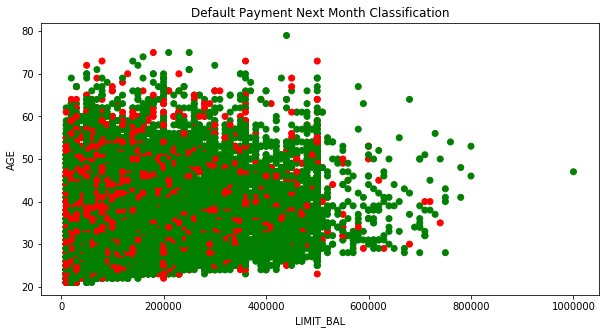

In [120]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(figsize=(10, 5))

colors = {1 :'red', 0 :'green'}

axs.scatter(credit['LIMIT_BAL'], credit['AGE'], c=credit['default payment next month'].map(colors))

plt.title('Default Payment Next Month Classification')

plt.xlabel('LIMIT_BAL')
plt.ylabel('AGE')

plt.axis()

### Now a Machine Learning Model will be trained to predict the default payment next month.

In [121]:
print(credit.groupby(['default payment next month']).size())

X = credit.drop(columns = ['default payment next month'])
Y = credit['default payment next month']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

default payment next month
0    23364
1     6636
dtype: int64


In [122]:
from sklearn import tree, ensemble
import copy

clf_rt = ensemble.RandomForestClassifier(n_estimators=5, max_depth=5, max_leaf_nodes=70, class_weight='balanced')

clf_rt.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=70,
                       n_estimators=5)

In [123]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, clf_rt.predict_proba(X_test)[:,1])

0.6137145973446196

### A dataset was created to compare the model's predictions.

In [124]:
RF = pd.concat([X_test])

predictions = clf_rt.predict(X_test)

RF['default payment next month'] = y_test
RF['Predictions'] = predictions

RF.head()

,LIMIT_BAL,AGE,default payment next month,Predictions
2308,30000,25,0,1
22404,150000,26,0,0
23397,70000,32,0,1
25058,130000,49,0,1
2664,50000,36,1,1


### Visualization of the predictions made.

(-29500.0059139785, 839500.0059139784, 18.0878587196468, 81.91214128035321)

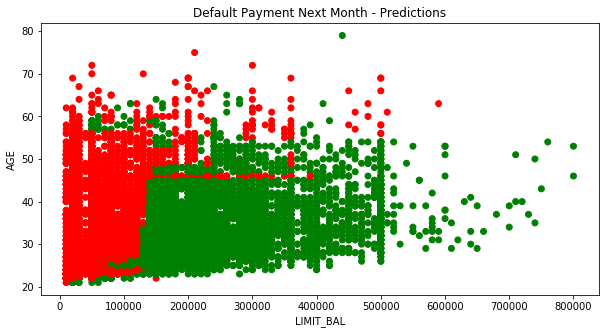

In [125]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(figsize=(10, 5))

colors = {1 :'red', 0 :'green'}

axs.scatter(RF['LIMIT_BAL'], RF['AGE'], c=RF['Predictions'].map(colors))

plt.title('Default Payment Next Month - Predictions')

plt.xlabel('LIMIT_BAL')
plt.ylabel('AGE')

plt.axis()

### Isolation Forest - Anomaly Detection.

In [126]:
from sklearn.ensemble import IsolationForest

iForest = IsolationForest(random_state=42, contamination=0.1).fit(X_train)

/home/ic-unicamp/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


#### Anomaly Scores bigger than 0.5 are consider an Outlier (Outlier Detection = -1) by the Model. 

In [127]:
IF = pd.concat([X_test])

IF['default payment next month'] = y_test
IF['Predictions'] = RF['Predictions']
IF['Anomaly Scores'] = iForest.decision_function(X_test)
IF['Outlier Detection'] = iForest.predict(X_test)

IF.head()

,LIMIT_BAL,AGE,default payment next month,Predictions,Anomaly Scores,Outlier Detection
2308,30000,25,0,1,0.084570,1
22404,150000,26,0,0,0.105722,1
23397,70000,32,0,1,0.089689,1
25058,130000,49,0,1,0.045467,1
2664,50000,36,1,1,0.103576,1


### Visualization of the outliers detected.

Text(0.5, 0, 'Outliers founded using Isolation Forest')

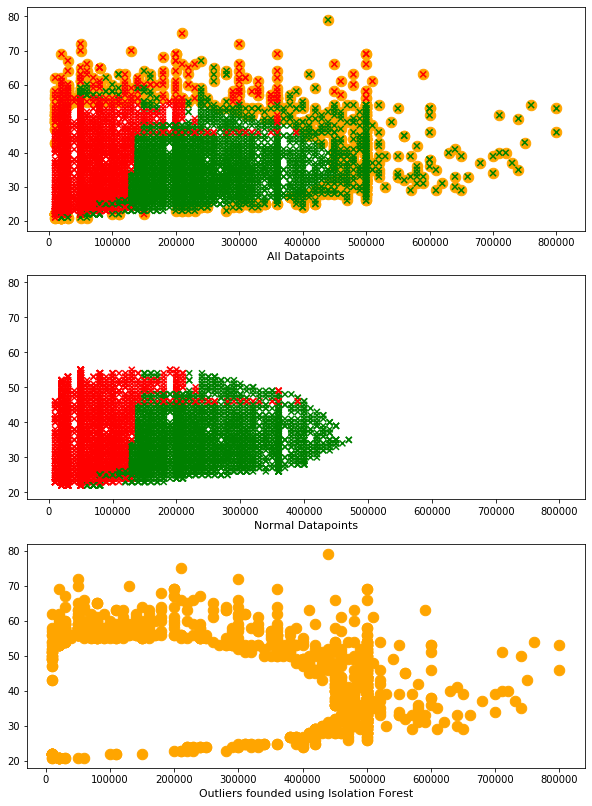

In [128]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(3, 1,figsize=(10, 14))

colors = {1 :'red', 0 :'green'}

outliers = IF["Outlier Detection"] == -1
outliers = IF[outliers]

normal = IF["Outlier Detection"] == 1
normal = IF[normal]

axs[0].scatter(outliers['LIMIT_BAL'], outliers['AGE'], marker="o", color="orange", s = 110)
axs[0].scatter(IF['LIMIT_BAL'], IF['AGE'], c=IF['Predictions'].map(colors),  marker="x")
axs[0].set_xlabel('All Datapoints',fontsize=11)

axs[1].scatter(outliers['LIMIT_BAL'], outliers['AGE'], marker="o", color="white", s = 110)
axs[1].scatter(normal['LIMIT_BAL'], normal['AGE'], c=normal['Predictions'].map(colors),  marker="x")
axs[1].set_xlabel('Normal Datapoints',fontsize=11)

axs[2].scatter(outliers['LIMIT_BAL'], outliers['AGE'], marker="o", color="orange", s = 110)
axs[2].set_xlabel('Outliers founded using Isolation Forest',fontsize=11)